## Proyecto de limpieza y transformación de Datos 

Para este proyecto, se utilizará el dataset [Spotify Top 50 Playlist Songs](https://www.kaggle.com/datasets/anxods/spotify-top-50-playlist-songs-anxods/data) de **Anxods** que se puede encontrar en la web de **Kaggle**. El dataset contiene información sobre las 50 canciones más escuchadas en Spotify, incluyendo detalles como el artista, título, número de reproducciones y la fecha en que se recopilaron los datos.

### Importar librerías

Cargamos las librerías:

In [2]:
import kagglehub
import os
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

### Descargar e importar el archivo .CSV

Descargamos el conjunto de datos desde Kaggle con la función proporcionada por la librería kagglehub, diseñada específicamente para simplificar la descarga de conjuntos de datos desde Kaggle. Seguidamente, se almacena la ruta del archivo local de los datos descargados en la variable path.

In [3]:
path = kagglehub.dataset_download("anxods/spotify-top-50-playlist-songs-anxods")

Listamos todos los archivos y carpetas almacenados en la variable path. Esto nos permite ver qué archivos se descargaron como parte del dataset.

In [4]:
files = os.listdir(path)
print("Archivos:", files)

Archivos: ['.github', '.gitignore', 'data', 'README.md', 'requirements.txt', 'src']


Listamos los archivos almacenados en 'data'.

In [5]:
print(os.listdir(path + '/data'))

['spotify-streaming-top-50-argentina.csv', 'spotify-streaming-top-50-france.csv', 'spotify-streaming-top-50-italy.csv', 'spotify-streaming-top-50-japan.csv', 'spotify-streaming-top-50-mexico.csv', 'spotify-streaming-top-50-south-korea.csv', 'spotify-streaming-top-50-spain.csv', 'spotify-streaming-top-50-uk.csv', 'spotify-streaming-top-50-usa.csv', 'spotify-streaming-top-50-world.csv']


Ahora que ya sabemos el nombre del documento que nos interesa cargar, almacenamos estos datos en un DataFrame de Pandas. Este DataFrame está listo para ser utilizado para manipulación y análisis de datos.

In [6]:
df = pd.read_csv(f"{path}/data/spotify-streaming-top-50-spain.csv")

### Exploración inicial

Mostramos las dimensiones del DataFrame.

In [7]:
df.shape

(27800, 11)

Mostramos las primeras 5 filas del DataFrame.

In [8]:
df.head()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Supernova,Saiko,84,190909,single,1,2023-04-19,False,https://i.scdn.co/image/ab67616d0000b273c3f5b9...
1,2023-05-18,2,EL TONTO,Lola Indigo,83,187986,album,11,2023-04-13,False,https://i.scdn.co/image/ab67616d0000b273daab36...
2,2023-05-18,3,Acróstico,Shakira,81,170785,single,1,2023-05-11,False,https://i.scdn.co/image/ab67616d0000b273bd6bbd...
3,2023-05-18,4,BESO,ROSALÍA & Rauw Alejandro,96,194543,single,3,2023-03-24,False,https://i.scdn.co/image/ab67616d0000b2734d6cf0...
4,2023-05-18,5,El Merengue,Marshmello & Manuel Turizo,91,189668,single,1,2023-03-03,False,https://i.scdn.co/image/ab67616d0000b273f40467...


Mostramos las estructura y el contenido de los datos.

In [9]:
df.info

<bound method DataFrame.info of              date  position                    song  \
0      2023-05-18         1               Supernova   
1      2023-05-18         2                EL TONTO   
2      2023-05-18         3               Acróstico   
3      2023-05-18         4                    BESO   
4      2023-05-18         5             El Merengue   
...           ...       ...                     ...   
27795  2024-11-27        46  Celine (with Kidd Keo)   
27796  2024-11-27        47                  Vacile   
27797  2024-11-27        48   Rapido (with Cris Mj)   
27798  2024-11-27        49               PELIGROSA   
27799  2024-11-27        50                    LUNA   

                              artist  popularity  duration_ms album_type  \
0                              Saiko          84       190909     single   
1                        Lola Indigo          83       187986      album   
2                            Shakira          81       170785     single   
3  

Mostramos los tipos de datos de cada columna del DataFrame.

In [10]:
df.dtypes

date               object
position            int64
song               object
artist             object
popularity          int64
duration_ms         int64
album_type         object
total_tracks        int64
release_date       object
is_explicit          bool
album_cover_url    object
dtype: object

Las variables que contiene el DataFrame són:

- date: Cuándo se recopilaron los datos (formato aaaa-mm-dd).
- position: La posición en la lista de reproducción de Spotify (del 1 al 50).
- song: Nombre de la canción.
- artist: Nombre del/los artista(s) de la canción. Si son varios, estarán separados con un &.
- popularity: Métrica dada por la API de Spotify para calificar la popularidad real de una canción.
- duration_ms: Duración de la canción en milisegundos.
- album_type: single/album…
- total_tracks: Número de pistas en el disco.
- release_date: Cuándo se lanzó la canción.
- is_explicit: Verdadero/Falso (True/False).
- album_cover_url: URL que contiene la imagen de la portada del álbum de la canción.

### Tratamiento de duplicados

Comenzamos mostrando las dimensiones iniciales del DataFrame antes de tratar los datos.

In [11]:
print('Dimensiones del DataFrame antes de la eliminación:', df.size)

Dimensiones del DataFrame antes de la eliminación: 305800


Eliminamos las filas duplicadas del DataFrame para asegurar que nuestro análisis y modelos se basen en datos precisos y confiables. Los registros duplicados podrían distorsionar los resultados.

In [12]:
df.drop_duplicates()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Supernova,Saiko,84,190909,single,1,2023-04-19,False,https://i.scdn.co/image/ab67616d0000b273c3f5b9...
1,2023-05-18,2,EL TONTO,Lola Indigo,83,187986,album,11,2023-04-13,False,https://i.scdn.co/image/ab67616d0000b273daab36...
2,2023-05-18,3,Acróstico,Shakira,81,170785,single,1,2023-05-11,False,https://i.scdn.co/image/ab67616d0000b273bd6bbd...
3,2023-05-18,4,BESO,ROSALÍA & Rauw Alejandro,96,194543,single,3,2023-03-24,False,https://i.scdn.co/image/ab67616d0000b2734d6cf0...
4,2023-05-18,5,El Merengue,Marshmello & Manuel Turizo,91,189668,single,1,2023-03-03,False,https://i.scdn.co/image/ab67616d0000b273f40467...
...,...,...,...,...,...,...,...,...,...,...,...
27795,2024-11-27,46,Celine (with Kidd Keo),Ghost Killer Track & Kidd Keo,73,176017,single,1,2023-07-07,False,https://i.scdn.co/image/ab67616d0000b273892224...
27796,2024-11-27,47,Vacile,Yan Block,78,140239,single,1,2022-09-30,True,https://i.scdn.co/image/ab67616d0000b273b7a46e...
27797,2024-11-27,48,Rapido (with Cris Mj),Dei V,76,146000,album,16,2024-06-14,True,https://i.scdn.co/image/ab67616d0000b2734258ad...
27798,2024-11-27,49,PELIGROSA,FloyyMenor,83,134930,album,7,2024-08-09,True,https://i.scdn.co/image/ab67616d0000b273200e2b...


Revisamos de nuevo las dimensiones del DataFrame para saber la cantidad de datos que hemos eliminado.

In [13]:
print('Dimensiones del DataFrame después de la eliminación', df.size)

Dimensiones del DataFrame después de la eliminación 305800


Podemos observar que en el caso de este proyecto, no teníamos datos duplicados.

### Tratamiento de nulos 

Mostramos la cantidad de valores nulos en cada columna del DataFrame.

In [14]:
df.isnull().sum()

date               0
position           0
song               0
artist             0
popularity         0
duration_ms        0
album_type         0
total_tracks       0
release_date       0
is_explicit        0
album_cover_url    0
dtype: int64

Como se puede observar, no tenemos valores nulos, por lo tanto, no es necesario tratarlos. En caso de haberlos, la estrategia a seguir dependerá de la cantidad y distribución de los nulos, así como del tipo de datos de cada columna.

Si la cantidad de nulos es pequeña y dispersa, una opción sencilla es eliminarlos con df.dropna(). Sin embargo, si hay muchos nulos, esta opción podría reducir significativamente el tamaño de la muestra y afectar los resultados.

En este último caso, se podría considerar la imputación de valores. Esto implica reemplazar los valores nulos por otros valores estimados. Algunas opciones comunes son:

- Media: Adecuada para datos numéricos con distribución simétrica.
- Mediana: Útil para datos numéricos con distribución asimétrica o presencia de valores atípicos.
- Moda: Apropiada para datos categóricos.

Es importante destacar que la elección del método de imputación dependerá del tipo de datos y de la naturaleza de los datos faltantes. Además, es fundamental realizar un análisis exploratorio previo para comprender la magnitud y el patrón de los datos faltantes, lo que ayudará a determinar la mejor estrategia a seguir.

### Análisis de distribución

Mostramos la distribución y las características de la columna 'popularity'. La estadística descriptiva nos da una idea del rango de valores, la tendencia central y la dispersión de los datos.

In [15]:
print(df['popularity'].describe())

count    27800.000000
mean        81.123957
std         10.088455
min          0.000000
25%         76.000000
50%         82.000000
75%         87.000000
max        100.000000
Name: popularity, dtype: float64


Mostramos un diagrama de caja y un histograma de la columna 'popularity' para entender y visualizar la distribución de los datos.

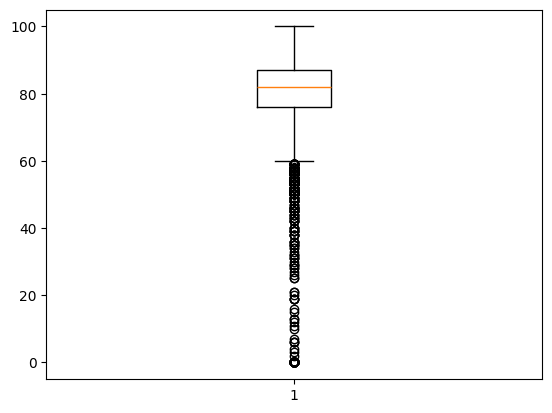

In [16]:
plt.boxplot(df['popularity'])
plt.show()

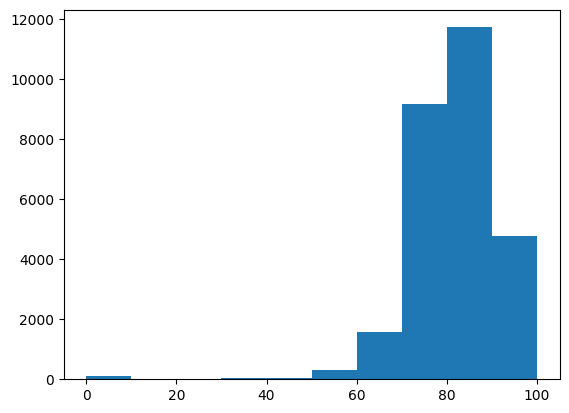

In [17]:
plt.hist(df['popularity'], bins=10)
plt.show()

Como se puede observar, la mayoría de valores se concentran por encima de 50. Por debajo, encontramos muchos valores atípicos (outliers).

Mostramos la distribución y las características de la columna 'duration_ms'.

In [18]:
print(df['duration_ms'].describe())

count     27800.000000
mean     197473.678237
std       43371.454913
min       90613.000000
25%      168594.000000
50%      191254.000000
75%      218119.000000
max      555071.000000
Name: duration_ms, dtype: float64


Mostramos un diagrama de caja y un histograma de la columna 'duration_ms'.

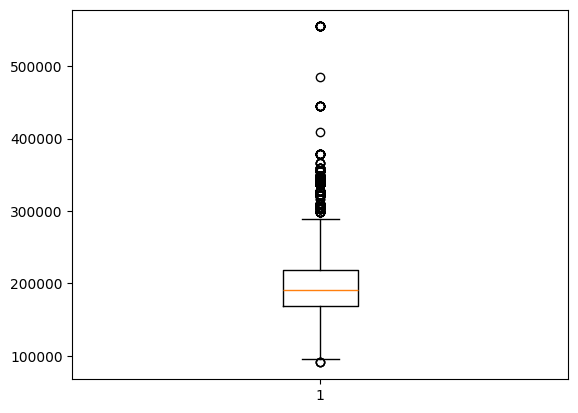

In [19]:
plt.boxplot(df['duration_ms'])
plt.show()

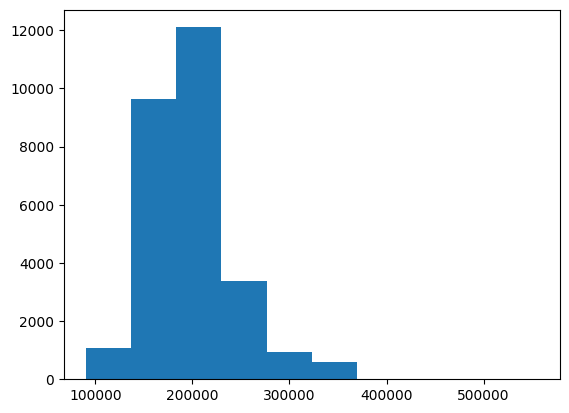

In [20]:
plt.hist(df['duration_ms'], bins=10)
plt.show()

En este caso, podemos observar que la mayoría de valores se concentran por debajo de los 300000. Por encima, encontramos muchos valores atípicos (outliers).

### Tratamiento de outliers

Como hemos observado, las columnas 'popularity' y 'duration_ms' presentan valores atípicos (outliers). Antes de abordarlos, es crucial considerar algunos aspectos.

En el análisis de popularidad de canciones en streaming, los valores bajos pueden representar canciones nuevas o de nicho, cuya eliminación distorsionaría la realidad. Los outliers pueden ser parte natural del fenómeno estudiado y contienen información valiosa.

En el contexto de la popularidad en Spotify, es común encontrar muchas canciones con baja popularidad (outliers inferiores), debido a su novedad, nicho o falta de reproducciones.

Dado que este proyecto se enfoca en las canciones más populares de 2024, las canciones con baja popularidad no aportan información relevante. Por lo tanto, eliminaré los valores atípicos, ya que no afectarán directamente los resultados deseados. Sin embargo, es fundamental recordar que la eliminación de outliers no siempre es recomendable y depende del enfoque del proyecto, ya que reflejan una realidad del dataset.

Filtramos el DataFrame y conservamos solo las filas donde el valor en la columna 'popularity' sea mayor que 50. El resto de las filas se eliminan.

In [21]:
df=df[df['popularity'] > 50]

Mostramos nuevamente un diagrama de caja y un histograma de la columna 'popularity'.

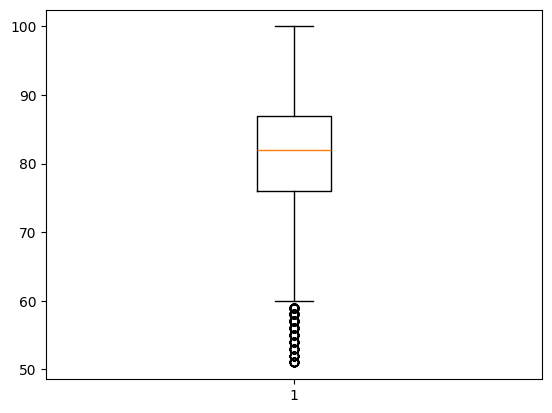

In [22]:
plt.boxplot(df['popularity'])
plt.show()

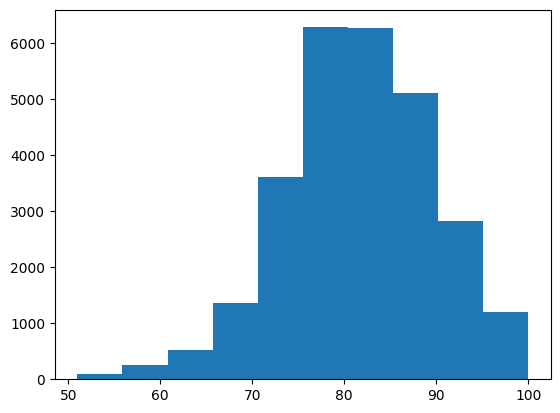

In [23]:
plt.hist(df['popularity'], bins=10)
plt.show()

Podemos observar que la gran mayoría de valores atípicos (outliers) han sido eliminados.

Filtramos el DataFrame y conservamos solo las filas donde el valor en la columna 'duration_ms' sea menor que 300000. El resto de las filas se eliminan.

In [24]:
df=df[df['duration_ms'] < 300000]

Mostramos nuevamente un diagrama de caja y un histograma de la columna 'duration_ms'.

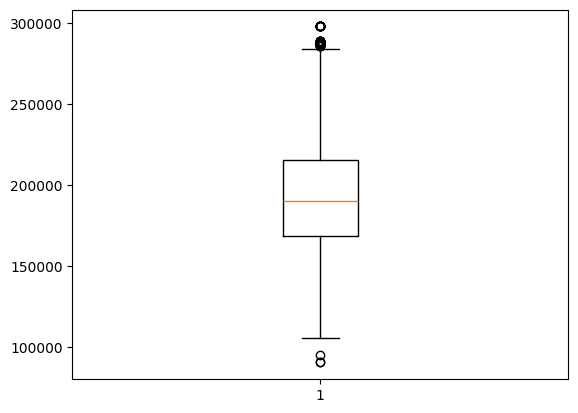

In [25]:
plt.boxplot(df['duration_ms'])
plt.show()

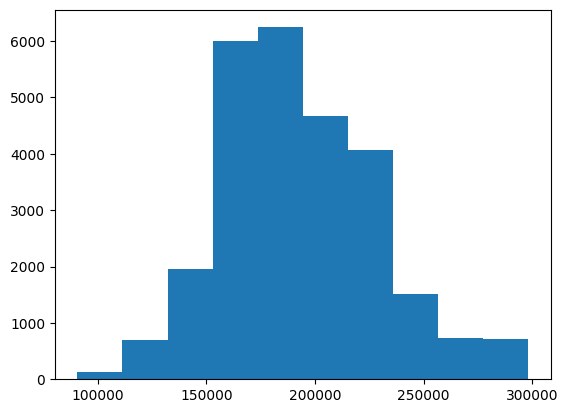

In [26]:
plt.hist(df['duration_ms'], bins=10)
plt.show()

Como en el caso de la columna "popularity", también podemos observar que la gran mayoría de valores atípicos (outliers) han sido eliminados.

### Eliminación de columnas

Por último, eliminamos columnas que no son relevantes para el análisis. En este caso, las columnas eliminadas 'date', 'total_tracks', 'is_explicit' y 'album_cover_url' no son necesarias para el análisis que vamos a realizar.

Eliminar columnas reduce la cantidad de variables en el DataFrame, lo cual puede ser útil para mejorar el rendimiento de ciertos algoritmos, visualizaciones o para simplificar el análisis.

Finalmente, verificamos el resultado de la eliminación de columnas obteniendo una vista previa de los datos restantes.

In [27]:
df = df.drop(columns=['date', 'total_tracks', 'is_explicit', 'album_cover_url'])

df.head()

,position,song,artist,popularity,duration_ms,album_type,release_date
0,1,Supernova,Saiko,84,190909,single,2023-04-19
1,2,EL TONTO,Lola Indigo,83,187986,album,2023-04-13
2,3,Acróstico,Shakira,81,170785,single,2023-05-11
3,4,BESO,ROSALÍA & Rauw Alejandro,96,194543,single,2023-03-24
4,5,El Merengue,Marshmello & Manuel Turizo,91,189668,single,2023-03-03


### Exportar el CSV

Una vez completada la limpieza y transformación de datos, procedemos a exportarlos. Para ello, definimos la variable ruta_y_archivo que contiene la ruta y el nombre del archivo donde se guardará el DataFrame. Posteriormente, guardamos el DataFrame en formato CSV utilizando el método to_csv() de Pandas.

In [ ]:
ruta_y_archivo = r'Aquí debes definir la ruta donde guardaras el documento en tu ordenador o MV'

df.to_csv(ruta_y_archivo)